<a href="https://colab.research.google.com/github/AabidMK/Object-Recognition-System__Infosys_Internship_Feb2025/blob/M-Sangeetha/Sangeetha_ORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/"))


['Le 14.pdf', 'LE 19.pdf', 'Colab Notebooks', 'IMG-20240821-WA0001.jpg', 'Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf', 'Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg', 'Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg', 'Frootiiiii 14.pdf', 'Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg', '.e summit pdf.pdf', 'MSANGEETHARESUME..df', 'Shruthi resume ', 'Ramya resume', 'Infosys survey (1).jpg', 'kaggle.json', 'coco2017_subset.zip', 'coco2017_subset', 'coco2017_subset....', 'internship', 'coco2017_subset_clean', 'Infosys survey.jpg']


In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/"))


True


In [ ]:
import os
os.listdir("/content/drive/MyDrive/")

['Le 14.pdf',
 'LE 19.pdf',
 'Colab Notebooks',
 'IMG-20240821-WA0001.jpg',
 'Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf',
 'Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg',
 'Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg',
 'Frootiiiii 14.pdf',
 'Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg',
 '.e summit pdf.pdf',
 'MSANGEETHARESUME..df',
 'Shruthi resume ',
 'Ramya resume',
 'Infosys survey (1).jpg',
 'kaggle.json',
 'coco2017_subset.zip',
 'coco2017_subset',
 'coco2017_subset....',
 'internship',
 'coco2017_subset_clean',
 'Infosys survey.jpg']

# **Task 1: Performing EDA for the COCO2017 dataset**

In [ ]:
import os
print(os.path.exists("/content/drive/MyDrive/coco2017_subset.zip"))


True


In [ ]:
!ls /content/drive/MyDrive/


 coco2017_subset	   kaggle.json
 coco2017_subset....	  'Le 14.pdf'
 coco2017_subset_clean	  'LE 19.pdf'
 coco2017_subset.zip	   MSANGEETHARESUME..df
'Colab Notebooks'	  'Ramya resume'
'Frootiiiii 14.pdf'	   Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf
 IMG-20240821-WA0001.jpg   Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey (1).jpg'   Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey.jpg'	   Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg
 internship		  'Shruthi resume '


In [ ]:
!find /content/drive/MyDrive -name "*.zip"


/content/drive/MyDrive/coco2017_subset.zip


In [ ]:
!unzip /content/drive/MyDrive/coco2017_subset.zip -d /content/extracted_files

Streaming output truncated to the last 5000 lines.
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508801.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508836.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508855.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508861.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508878.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508881.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508906.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508938.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508969.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508972.jpg  
  inflating: /content/extracted_files/coco2017_subset/train2017/000000508984.jpg  
  inflating: /content/extracted_file

In [ ]:
import os #for handling file operations
from pycocotools.coco import COCO #to load coco annotations
import matplotlib.pyplot as plt #to visualize the results
import matplotlib.patches as patches #Draws bounding boxes
import cv2 #Loads and processes images

In [ ]:
ANNOTATION_FILE = '/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json'
#Contain metadata like bounding boxes, segmentation masks, and object categories for trainig images.
IMAGE_FOLDER = '/content/extracted_files/coco2017_subset/train2017'
#the actual image folder

In [ ]:
import os

ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"

if not os.path.exists(ANNOTATION_FILE):
    print("Error: Annotation file not found!")
else:
    print("Annotation file exists.")


Annotation file exists.


In [ ]:
import os

base_dir = "/content/extracted_files"
if os.path.exists(base_dir):
    print("Base directory exists:", os.listdir(base_dir))
else:
    print("Base directory does NOT exist!")


Base directory exists: ['coco2017_subset']


In [ ]:
subset_dir = "/content/extracted_files/coco2017_subset"
if os.path.exists(subset_dir):
    print("Subset directory exists:", os.listdir(subset_dir))
else:
    print("Subset directory does NOT exist!")


Subset directory exists: ['train2017', 'val2017', 'test2017', 'annotation_subset']


In [ ]:
!find /content -type d -name "coco2017_subset"


/content/extracted_files/coco2017_subset
/content/drive/MyDrive/coco2017_subset
/content/drive/MyDrive/internship/coco2017_subset
/content/drive/MyDrive/internship/coco2017_subset/coco2017_subset
/content/drive/.Encrypted/MyDrive/coco2017_subset
/content/drive/.Encrypted/MyDrive/internship/coco2017_subset
/content/drive/.Encrypted/MyDrive/internship/coco2017_subset/coco2017_subset


In [ ]:
ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"


In [ ]:
search_dir = "/content"
file_name = "instances_train2017_subset.json"

# Search for the file
found_path = None
for root, dirs, files in os.walk(search_dir):
    if file_name in files:
        found_path = os.path.join(root, file_name)
        break

if found_path:
    ANNOTATION_FILE = found_path  # Automatically use the correct path
    print("File found at:", ANNOTATION_FILE)
else:
    print("File not found!")

# Check if the file exists
if os.path.exists(ANNOTATION_FILE):
    print("File exists. Proceeding...")
else:
    print("Error: File does NOT exist. Check the path!")


File found at: /content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json
File exists. Proceeding...


In [ ]:
import os

search_dir = "/content"  # Change this if needed
file_name = "instances_train2017_subset.json"

# Search for the file
for root, dirs, files in os.walk(search_dir):
    if file_name in files:
        print("Found file at:", os.path.join(root, file_name))
        break
else:
    print("File not found!")


Found file at: /content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json


In [ ]:
ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json" # Update with the correct path

if os.path.exists(ANNOTATION_FILE):
    print("File exists. Proceeding...")
else:
    print("Error: File does NOT exist. Check the path!")


File exists. Proceeding...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Now check inside your Google Drive
!ls /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 coco2017_subset	   kaggle.json
 coco2017_subset....	  'Le 14.pdf'
 coco2017_subset_clean	  'LE 19.pdf'
 coco2017_subset.zip	   MSANGEETHARESUME..df
'Colab Notebooks'	  'Ramya resume'
'Frootiiiii 14.pdf'	   Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf
 IMG-20240821-WA0001.jpg   Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey (1).jpg'   Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey.jpg'	   Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg
 internship		  'Shruthi resume '


In [ ]:
ANNOTATION_FILE = "/content/drive/MyDrive/coco2017/annotations/instances_train2017_subset.json"


In [ ]:
from pycocotools.coco import COCO

# Update with correct path
ANNOTATION_FILE = ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json" # Update with the correct path


if os.path.exists(ANNOTATION_FILE):
    coco = COCO(ANNOTATION_FILE)
    print("COCO dataset loaded successfully!")
else:
    print("Error: COCO annotation file not found!")


loading annotations into memory...
Done (t=5.21s)
creating index...
index created!
COCO dataset loaded successfully!


In [ ]:
!find /content -name "instances_train2017_subset.json"


/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json
/content/drive/MyDrive/internship/coco2017_subset/coco2017_subset/annotation_subset/instances_train2017_subset.json
/content/drive/MyDrive/coco2017_subset_clean/annotation_subset/instances_train2017_subset.json


In [ ]:
import os

if os.path.exists(ANNOTATION_FILE):
    print("✅ File exists! Proceeding...")
else:
    print("❌ Error: File does NOT exist. Check the path!")


✅ File exists! Proceeding...


In [ ]:
from pycocotools.coco import COCO

coco = COCO(ANNOTATION_FILE)
print("✅ COCO dataset loaded successfully!")


loading annotations into memory...
Done (t=5.97s)
creating index...
index created!
✅ COCO dataset loaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

path = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"
print("Exists:", os.path.exists(path))  # Check if the path exists


Exists: True


In [ ]:
!find /content -type d -name "annotation_subset"


/content/extracted_files/coco2017_subset/annotation_subset
/content/drive/MyDrive/internship/coco2017_subset/coco2017_subset/annotation_subset
/content/drive/MyDrive/coco2017_subset_clean/annotation_subset
/content/drive/.Encrypted/MyDrive/internship/coco2017_subset/coco2017_subset/annotation_subset
/content/drive/.Encrypted/MyDrive/coco2017_subset_clean/annotation_subset


In [ ]:
import os

# Choose the correct path from the search results
path = "/content/drive/MyDrive/coco2017_subset (1)/annotation_subset"
print("Exists:", os.path.exists(path))  # Check again


Exists: False


In [ ]:
ANNOTATION_FILE = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"

from pycocotools.coco import COCO
coco = COCO(ANNOTATION_FILE)  # Load COCO file


loading annotations into memory...
Done (t=6.05s)
creating index...
index created!


In [ ]:
import os

correct_path = "/content/drive/MyDrive/coco2017_subset (1)/annotation_subset"
print("Exists:", os.path.exists(correct_path))

# List files if the path exists
if os.path.exists(correct_path):
    print(os.listdir(correct_path))
else:
    print("Directory not found!")



Exists: False
Directory not found!


In [ ]:
# Initialize COCO API for instance annotations
#Loads COCO annotations from the given JSON file.
coco = COCO(ANNOTATION_FILE)

loading annotations into memory...
Done (t=4.86s)
creating index...
index created!


In [ ]:
import seaborn as sns #Provides beautiful statistical visualizations.
import numpy as np #Useful for handling numerical operations.
import random #Used to pick a random image for visualization.

In [ ]:
categories=coco.loadCats(coco.getCatIds())#Retrieve all category metadata
category_names=[cat['name'] for cat in categories]
annotations=coco.dataset['annotations'] #Extracts all annotations (bounding boxes, masks category ids, etc.).
images=coco.dataset['images'] #Extracts all image metadata (file names, IDs, etc.)

In [ ]:
#basic dataset statistics
print(f"Total categories:{len(categories)}")
print(f"Total images:{len(images)}")
print(f"Total annotations:{len(annotations)}")

Total categories:80
Total images:29571
Total annotations:212806


In [ ]:
#compute category distribution - counting occurrences if each category
#how many times a category has appeared in the annotations
category_counts={}
for ann in annotations:
  cat_id=ann['category_id']
  category_counts[cat_id]=category_counts.get(cat_id,0)+1;
print(category_counts)

{18: 1409, 64: 2097, 72: 1466, 16: 2839, 17: 1227, 19: 1677, 20: 2168, 21: 1855, 44: 5780, 63: 1453, 62: 9703, 67: 3759, 2: 1731, 3: 10945, 4: 2105, 5: 1369, 6: 1449, 7: 1136, 9: 2815, 1: 65165, 13: 522, 28: 2708, 32: 1618, 37: 1590, 65: 1077, 77: 1624, 82: 668, 85: 1585, 90: 473, 8: 2649, 10: 2982, 11: 480, 14: 291, 15: 2398, 22: 1348, 25: 1311, 34: 724, 35: 1701, 36: 709, 38: 2239, 41: 1399, 42: 1507, 43: 1245, 46: 1951, 47: 4868, 48: 1275, 49: 1881, 50: 1514, 51: 3745, 52: 2466, 53: 1392, 55: 1498, 56: 1851, 57: 1924, 61: 1513, 70: 969, 73: 1250, 74: 585, 75: 1394, 76: 754, 78: 416, 79: 817, 80: 52, 81: 1329, 84: 6185, 86: 1732, 87: 390, 88: 1113, 27: 2243, 31: 3019, 33: 1465, 54: 1010, 58: 612, 59: 1419, 89: 38, 60: 1841, 24: 1283, 40: 893, 23: 321, 39: 802}


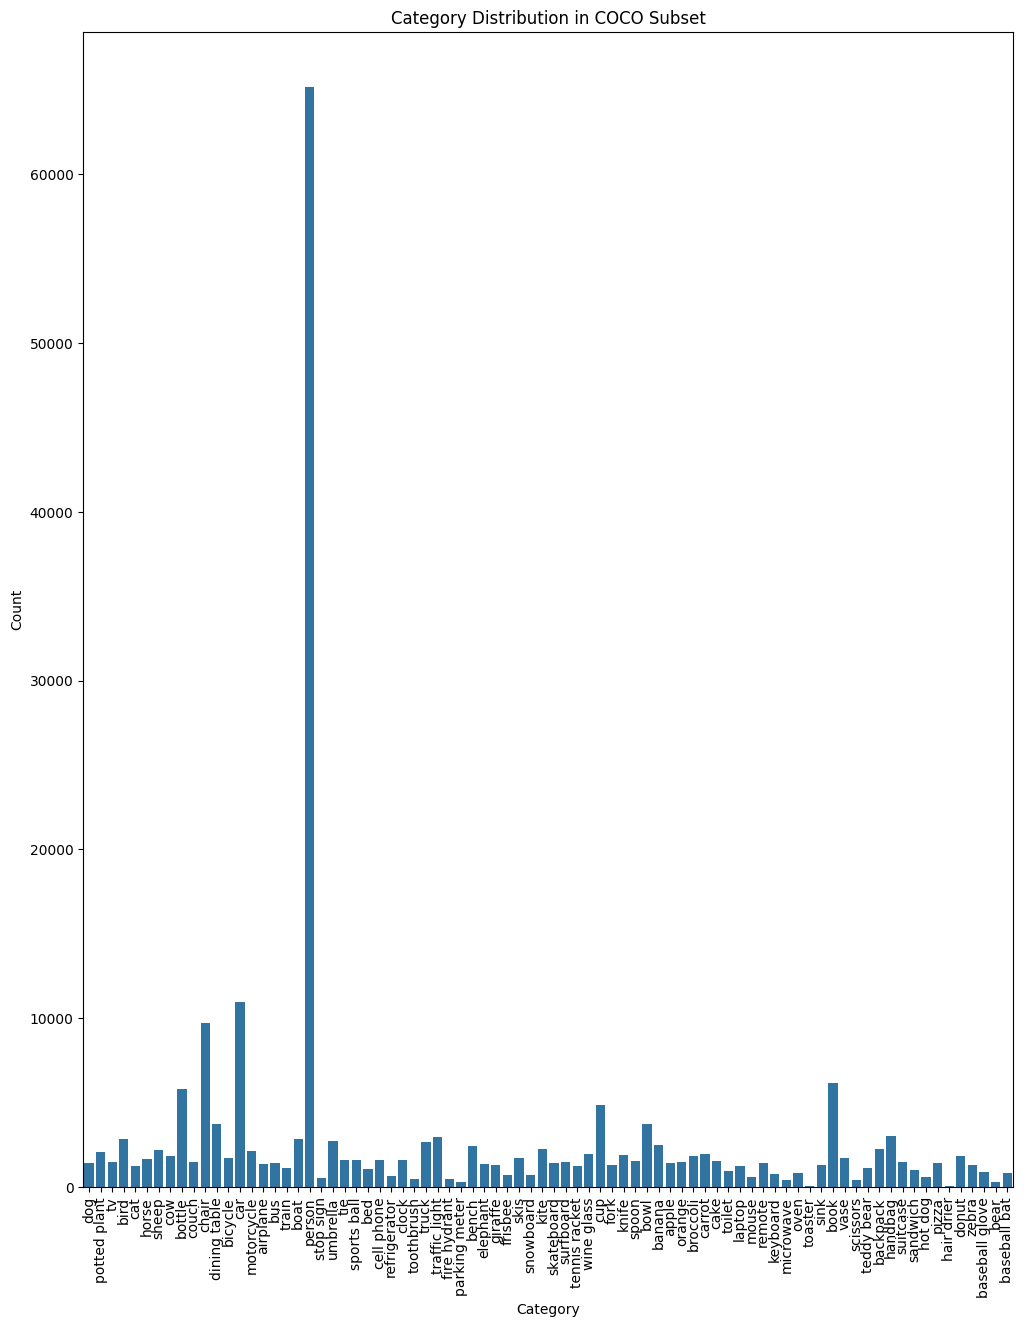

In [ ]:
#plotting category distribution
#Uses Seaborn to create a bar plot showing how many times each category appears in the dataset.
plt.figure(figsize=(12,15))
sns.barplot(x=[coco.cats[cat]['name'] for cat in category_counts.keys()],y=list(category_counts.values()))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution in COCO Subset")
plt.show()

In [ ]:
#Number of objects or instances per image
image_counts={}
for ann in annotations:
  img_id=ann['image_id']
  image_counts[img_id]=image_counts.get(img_id,0)+1

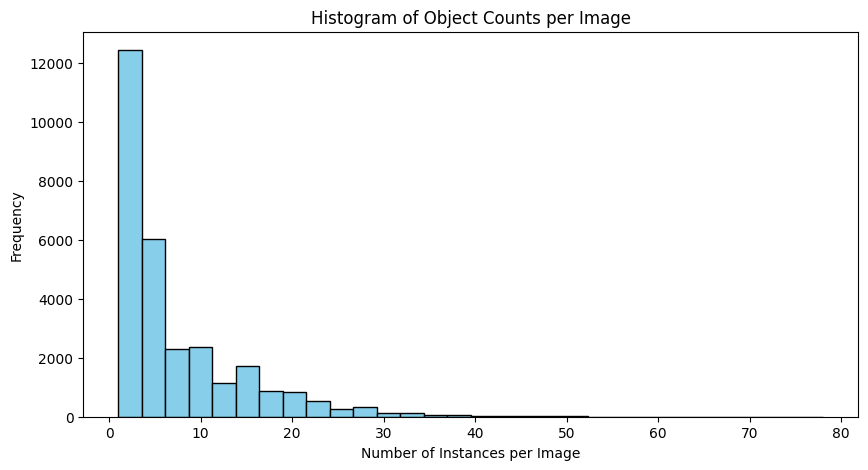

In [ ]:
#histogram for object count per image
plt.figure(figsize=(10,5))
plt.hist(image_counts.values(),bins=30,color='skyblue',edgecolor='black')
plt.xlabel("Number of Instances per Image")
plt.ylabel("Frequency")
plt.title("Histogram of Object Counts per Image")
plt.show()

In [ ]:
#Function to show a random image with annotations
def show_random_image():
  img_id=random.choice(images)['id']
  img_info=coco.loadImgs(img_id)[0]
  img_path=os.path.join(IMAGE_FOLDER,img_info['file_name'])
  image=cv2.imread(img_path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(8,8))
  plt.imshow(image)
  ann_ids=coco.getAnnIds(imgIds=img_id)
  anns=coco.loadAnns(ann_ids)
  coco.showAnns(anns)
  plt.title(f"ImageId:{img_id}")
  plt.show()

In [ ]:
import os

IMAGE_FOLDER = "/content/extracted_files/coco2017_subset/train2017"

# List all files in the directory
image_files = os.listdir(IMAGE_FOLDER)

if image_files:
    img_file = random.choice(image_files)  # Pick a random image
    print("IMAGE_FOLDER:", IMAGE_FOLDER)
    print("File Name:", img_file)
else:
    print("No images found in the directory!")


IMAGE_FOLDER: /content/extracted_files/coco2017_subset/train2017
File Name: 000000360397.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
print("Directory exists:", os.path.exists("/content/extracted_files/coco2017_subset/train2017"))


Directory exists: True


In [ ]:
import os

file_path = "/content/extracted_files/coco2017_subset/train2017"
print("Files in directory:", os.listdir(file_path))


Files in directory: ['000000081056.jpg', '000000258000.jpg', '000000492705.jpg', '000000454181.jpg', '000000438728.jpg', '000000068597.jpg', '000000319096.jpg', '000000105096.jpg', '000000505888.jpg', '000000247199.jpg', '000000275604.jpg', '000000190920.jpg', '000000202799.jpg', '000000181745.jpg', '000000558924.jpg', '000000546295.jpg', '000000248674.jpg', '000000495625.jpg', '000000136123.jpg', '000000437806.jpg', '000000084749.jpg', '000000565675.jpg', '000000090351.jpg', '000000050846.jpg', '000000139011.jpg', '000000339498.jpg', '000000431686.jpg', '000000341246.jpg', '000000067339.jpg', '000000254357.jpg', '000000261783.jpg', '000000229984.jpg', '000000052689.jpg', '000000269922.jpg', '000000262299.jpg', '000000515485.jpg', '000000495489.jpg', '000000041962.jpg', '000000048867.jpg', '000000438855.jpg', '000000081767.jpg', '000000289140.jpg', '000000325302.jpg', '000000130875.jpg', '000000267048.jpg', '000000544786.jpg', '000000131666.jpg', '000000569958.jpg', '000000075254.jpg',

In [ ]:
for file in os.listdir(file_path):
    print(file)


000000081056.jpg
000000258000.jpg
000000492705.jpg
000000454181.jpg
000000438728.jpg
000000068597.jpg
000000319096.jpg
000000105096.jpg
000000505888.jpg
000000247199.jpg
000000275604.jpg
000000190920.jpg
000000202799.jpg
000000181745.jpg
000000558924.jpg
000000546295.jpg
000000248674.jpg
000000495625.jpg
000000136123.jpg
000000437806.jpg
000000084749.jpg
000000565675.jpg
000000090351.jpg
000000050846.jpg
000000139011.jpg
000000339498.jpg
000000431686.jpg
000000341246.jpg
000000067339.jpg
000000254357.jpg
000000261783.jpg
000000229984.jpg
000000052689.jpg
000000269922.jpg
000000262299.jpg
000000515485.jpg
000000495489.jpg
000000041962.jpg
000000048867.jpg
000000438855.jpg
000000081767.jpg
000000289140.jpg
000000325302.jpg
000000130875.jpg
000000267048.jpg
000000544786.jpg
000000131666.jpg
000000569958.jpg
000000075254.jpg
000000226594.jpg
000000331250.jpg
000000367280.jpg
000000255448.jpg
000000100409.jpg
000000049434.jpg
000000175653.jpg
000000447130.jpg
000000474253.jpg
000000147600.j

In [ ]:
import difflib

filename = "00000522418.jpg"
files = os.listdir(file_path)
closest_match = difflib.get_close_matches(filename, files, n=1)

if closest_match:
    print("Did you mean:", closest_match[0])
else:
    print("No close matches found.")


Did you mean: 000000522418.jpg


In [ ]:
import glob
print(glob.glob(file_path + "/*"))


['/content/extracted_files/coco2017_subset/train2017/000000081056.jpg', '/content/extracted_files/coco2017_subset/train2017/000000258000.jpg', '/content/extracted_files/coco2017_subset/train2017/000000492705.jpg', '/content/extracted_files/coco2017_subset/train2017/000000454181.jpg', '/content/extracted_files/coco2017_subset/train2017/000000438728.jpg', '/content/extracted_files/coco2017_subset/train2017/000000068597.jpg', '/content/extracted_files/coco2017_subset/train2017/000000319096.jpg', '/content/extracted_files/coco2017_subset/train2017/000000105096.jpg', '/content/extracted_files/coco2017_subset/train2017/000000505888.jpg', '/content/extracted_files/coco2017_subset/train2017/000000247199.jpg', '/content/extracted_files/coco2017_subset/train2017/000000275604.jpg', '/content/extracted_files/coco2017_subset/train2017/000000190920.jpg', '/content/extracted_files/coco2017_subset/train2017/000000202799.jpg', '/content/extracted_files/coco2017_subset/train2017/000000181745.jpg', '/con

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/"


 coco2017_subset	   kaggle.json
 coco2017_subset....	  'Le 14.pdf'
 coco2017_subset_clean	  'LE 19.pdf'
 coco2017_subset.zip	   MSANGEETHARESUME..df
'Colab Notebooks'	  'Ramya resume'
'Frootiiiii 14.pdf'	   Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf
 IMG-20240821-WA0001.jpg   Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey (1).jpg'   Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey.jpg'	   Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg
 internship		  'Shruthi resume '


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset"


In [ ]:
IMAGE_FOLDER = "/content/drive/MyDrive/coco2017_subset (1)/train2017"


In [ ]:
IMAGE_FOLDER = "/content/drive/MyDrive/coco2017_subset_clean/train2017"


In [ ]:
!ls /content/drive/MyDrive/coco2017_subset_clean/train2017 | grep "000000522418"


In [ ]:
!ls /content/drive/MyDrive/coco2017_subset_clean/train2017 | grep "000000522418"


In [ ]:
!ls -b "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "000000522418"


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "00000052"


000000005205.jpg
000000005210.jpg
000000005219.jpg
000000005259.jpg
0000005294.jpg


In [ ]:
img_path = os.path.join(IMAGE_FOLDER, "000000522418.png")


In [ ]:
img_path = "/content/drive/MyDrive/coco2017_subset_clean/train2017/0000005294.jpg"
print("File exists:", os.path.exists(img_path))


File exists: True


In [ ]:
print("Full path:", img_path)


Full path: /content/drive/MyDrive/coco2017_subset_clean/train2017/0000005294.jpg


In [ ]:
!ls /content/drive/MyDrive


 coco2017_subset	   kaggle.json
 coco2017_subset....	  'Le 14.pdf'
 coco2017_subset_clean	  'LE 19.pdf'
 coco2017_subset.zip	   MSANGEETHARESUME..df
'Colab Notebooks'	  'Ramya resume'
'Frootiiiii 14.pdf'	   Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf
 IMG-20240821-WA0001.jpg   Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey (1).jpg'   Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg
'Infosys survey.jpg'	   Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg
 internship		  'Shruthi resume '


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean"


annotation_subset  test2017  train2017	val2017


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "0000005294"


0000005294.jpg


In [ ]:
!ls -b "/content/drive/MyDrive/coco2017_subset_clean/train2017"


000000000034.jpg  000000004138.jpg  000000007452.jpg  000000010779.jpg	000000014484.jpg
000000000036.jpg  000000004159.jpg  000000007455.jpg  000000010784.jpg	000000014504.jpg
000000000073.jpg  000000004180.jpg  000000007489.jpg  000000010793.jpg	000000014536.jpg
000000000074.jpg  000000004189.jpg  000000007498.jpg  000000010800.jpg	000000014546.jpg
000000000089.jpg  000000004219.jpg  000000007500.jpg  000000010817.jpg	000000014567.jpg
000000000092.jpg  000000004243.jpg  000000007524.jpg  000000010822.jpg	000000014592.jpg
000000000109.jpg  000000004278.jpg  000000007544.jpg  000000010837.jpg	000000014628.jpg
000000000196.jpg  000000004282.jpg  000000007556.jpg  000000011025.jpg	000000014635.jpg
000000000247.jpg  000000004308.jpg  000000007566.jpg  000000011042.jpg	000000014662.jpg
000000000260.jpg  000000004319.jpg  000000007583.jpg  000000011081.jpg	000000014677.jpg
000000000263.jpg  000000004359.jpg  000000007596.jpg  000000011099.jpg	000000014698.jpg
000000000308.jpg  000000004377.j

In [ ]:
import os

IMAGE_FOLDER = "/content/drive/MyDrive/coco2017_subset_clean/train2017"
img_file = "0000005294.jpg"
img_path = os.path.join(IMAGE_FOLDER, img_file)

print("Full path:", img_path)
print("File exists:", os.path.exists(img_path))


Full path: /content/drive/MyDrive/coco2017_subset_clean/train2017/0000005294.jpg
File exists: True


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "0000005294"


0000005294.jpg


In [ ]:
!ls -b "/content/drive/MyDrive/coco2017_subset_clean/train2017"


000000000034.jpg  000000004138.jpg  000000007452.jpg  000000010779.jpg	000000014484.jpg
000000000036.jpg  000000004159.jpg  000000007455.jpg  000000010784.jpg	000000014504.jpg
000000000073.jpg  000000004180.jpg  000000007489.jpg  000000010793.jpg	000000014536.jpg
000000000074.jpg  000000004189.jpg  000000007498.jpg  000000010800.jpg	000000014546.jpg
000000000089.jpg  000000004219.jpg  000000007500.jpg  000000010817.jpg	000000014567.jpg
000000000092.jpg  000000004243.jpg  000000007524.jpg  000000010822.jpg	000000014592.jpg
000000000109.jpg  000000004278.jpg  000000007544.jpg  000000010837.jpg	000000014628.jpg
000000000196.jpg  000000004282.jpg  000000007556.jpg  000000011025.jpg	000000014635.jpg
000000000247.jpg  000000004308.jpg  000000007566.jpg  000000011042.jpg	000000014662.jpg
000000000260.jpg  000000004319.jpg  000000007583.jpg  000000011081.jpg	000000014677.jpg
000000000263.jpg  000000004359.jpg  000000007596.jpg  000000011099.jpg	000000014698.jpg
000000000308.jpg  000000004377.j

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!chmod 777 "/content/drive/MyDrive/coco2017_subset_clean/train2017/0000005294.jpg"


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "0000005294"


0000005294.jpg


In [ ]:
!ls "/content/drive/MyDrive/coco2017_subset_clean/train2017" | grep "0000005294"


0000005294.jpg


In [ ]:
import os

IMAGE_FOLDER = "/content/drive/MyDrive/coco2017_subset_clean/train2017"
img_file = "0000005294.jpg"
img_path = os.path.join(IMAGE_FOLDER, img_file)

print("Full path:", img_path)
print("File exists:", os.path.exists(img_path))


Full path: /content/drive/MyDrive/coco2017_subset_clean/train2017/0000005294.jpg
File exists: True


In [ ]:
!ls -l "/content/drive/MyDrive/coco2017_subset_clean/train2017/"


total 147382
-rw------- 1 root root 406018 Sep  4  2020 000000000034.jpg
-rw------- 1 root root 260207 Sep  4  2020 000000000036.jpg
-rw------- 1 root root 383651 Sep  4  2020 000000000073.jpg
-rw------- 1 root root 176151 Sep  4  2020 000000000074.jpg
-rw------- 1 root root 163624 Sep  4  2020 000000000089.jpg
-rw------- 1 root root  73926 Sep  4  2020 000000000092.jpg
-rw------- 1 root root 234013 Sep  4  2020 000000000109.jpg
-rw------- 1 root root 158943 Sep  4  2020 000000000196.jpg
-rw------- 1 root root 158250 Sep  4  2020 000000000247.jpg
-rw------- 1 root root  95001 Sep  4  2020 000000000260.jpg
-rw------- 1 root root 224437 Sep  4  2020 000000000263.jpg
-rw------- 1 root root 138329 Sep  4  2020 000000000308.jpg
-rw------- 1 root root 299562 Sep  4  2020 000000000312.jpg
-rw------- 1 root root 184384 Sep  4  2020 000000000315.jpg
-rw------- 1 root root 177582 Sep  4  2020 000000000321.jpg
-rw------- 1 root root 131457 Sep  4  2020 000000000357.jpg
-rw------- 1 root root  524

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls -b "/content/drive/MyDrive/coco2017_subset_clean/train2017/"


000000000034.jpg  000000004138.jpg  000000007452.jpg  000000010779.jpg	000000014484.jpg
000000000036.jpg  000000004159.jpg  000000007455.jpg  000000010784.jpg	000000014504.jpg
000000000073.jpg  000000004180.jpg  000000007489.jpg  000000010793.jpg	000000014536.jpg
000000000074.jpg  000000004189.jpg  000000007498.jpg  000000010800.jpg	000000014546.jpg
000000000089.jpg  000000004219.jpg  000000007500.jpg  000000010817.jpg	000000014567.jpg
000000000092.jpg  000000004243.jpg  000000007524.jpg  000000010822.jpg	000000014592.jpg
000000000109.jpg  000000004278.jpg  000000007544.jpg  000000010837.jpg	000000014628.jpg
000000000196.jpg  000000004282.jpg  000000007556.jpg  000000011025.jpg	000000014635.jpg
000000000247.jpg  000000004308.jpg  000000007566.jpg  000000011042.jpg	000000014662.jpg
000000000260.jpg  000000004319.jpg  000000007583.jpg  000000011081.jpg	000000014677.jpg
000000000263.jpg  000000004359.jpg  000000007596.jpg  000000011099.jpg	000000014698.jpg
000000000308.jpg  000000004377.j

Total Images Found: 913
Image Path: /content/drive/MyDrive/coco2017_subset_clean/train2017/000000001722.jpg


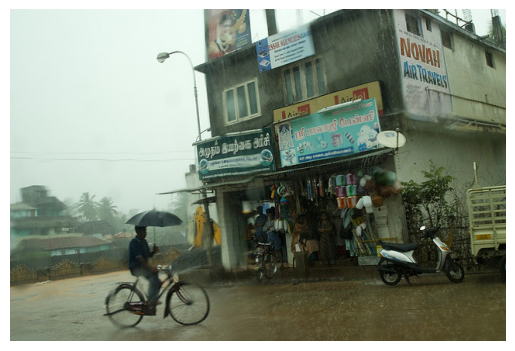

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Set your image directory
IMAGE_FOLDER = "/content/drive/MyDrive/coco2017_subset_clean/train2017"

# List all image files in the directory
image_files = os.listdir(IMAGE_FOLDER)
print("Total Images Found:", len(image_files))  # Debugging step

# Pick a random image
random_image = random.choice(image_files)
image_path = os.path.join(IMAGE_FOLDER, random_image)

# Check if the file exists
if os.path.exists(image_path):
    print("Image Path:", image_path)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print("Error: Image file not found!")


In [ ]:
img_id = coco.getImgIds()[0]  # Get the first image ID
img_info = coco.loadImgs(img_id)[0]  # Load image info


In [ ]:
import os

image_folder = "/content/extracted_files/coco2017_subset/train2017"
print("Exists:", os.path.exists(image_folder))

if os.path.exists(image_folder):
    print("Files in directory:", os.listdir(image_folder)[:5])  # Show first 5 files
else:
    print("Error: The directory does not exist!")


Exists: True
Files in directory: ['000000081056.jpg', '000000258000.jpg', '000000492705.jpg', '000000454181.jpg', '000000438728.jpg']


In [ ]:
!find /content -type d -name "train2017"


/content/extracted_files/coco2017_subset/train2017
/content/drive/MyDrive/internship/coco2017_subset/coco2017_subset/train2017
/content/drive/MyDrive/internship/coco2017_subset/coco2017_subset/train2017/train2017
/content/drive/MyDrive/coco2017_subset_clean/train2017
/content/drive/.Encrypted/MyDrive/internship/coco2017_subset/coco2017_subset/train2017
/content/drive/.Encrypted/MyDrive/internship/coco2017_subset/coco2017_subset/train2017/train2017
/content/drive/.Encrypted/MyDrive/coco2017_subset_clean/train2017


In [ ]:
IMAGE_FOLDER ="/content/drive/MyDrive/coco2017_subset/train2017"



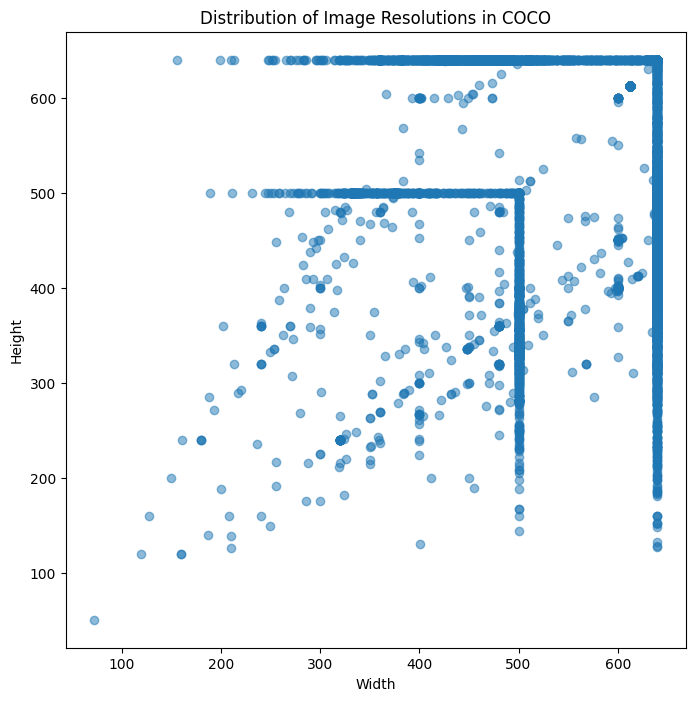

In [ ]:
# Extract image sizes
image_sizes = [(coco.imgs[img_id]['width'], coco.imgs[img_id]['height']) for img_id in coco.imgs]
widths, heights = zip(*image_sizes)
#unzips the list of tuples, separating the widths and heights into two lists.
# Scatter plot of width vs height
plt.figure(figsize=(8,8))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Distribution of Image Resolutions in COCO")
plt.show()


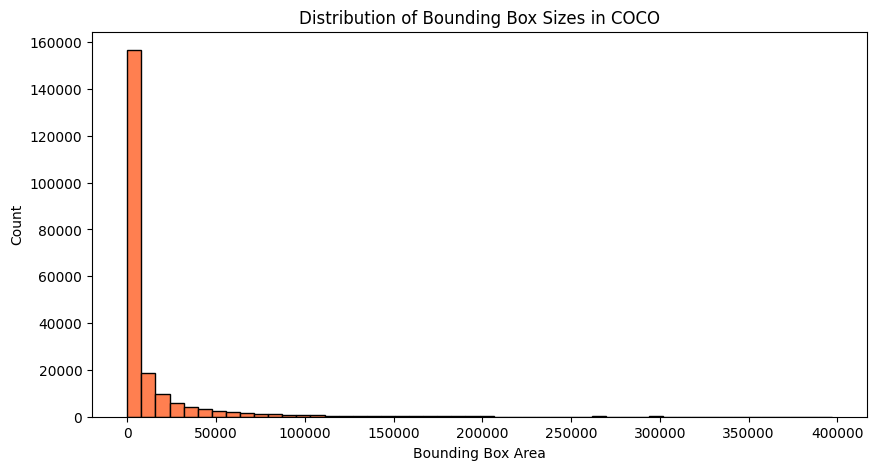

In [ ]:
# Extract bounding box sizes
bbox_areas = [ann['area'] for ann in coco.anns.values()]
# Histogram of bounding box areas
plt.figure(figsize=(10,5))
plt.hist(bbox_areas, bins=50, color='coral', edgecolor='black')
plt.xlabel("Bounding Box Area")
plt.ylabel("Count")
plt.title("Distribution of Bounding Box Sizes in COCO")
plt.show()

In [ ]:
import os
image_folder = "/content/drive/MyDrive/coco2017_subset\\ (1)/train2017"
print("Exists:", os.path.exists(image_folder))
if os.path.exists(image_folder):
    print("Files:", os.listdir(image_folder)[:5])  # Show first 5 files
else:
    print("Error: The directory does not exist!")


Exists: False
Error: The directory does not exist!


In [ ]:
image_folder = "/content/drive/MyDrive/coco2017_subset\\ (1)/train2017"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random


In [ ]:
from pycocotools.coco import COCO


In [ ]:
import os

root_dir = "/content/extracted_files"
print("Folders inside extracted_files:", os.listdir(root_dir))


Folders inside extracted_files: ['coco2017_subset']


In [ ]:
#image with bounding boxes
from PIL import Image #opening, manipulating, and saving images in Python
import matplotlib.patches as patches #provides various shapes and geometric objects

# Select a random image
img_id = random.choice(list(coco.imgs.keys()))
img_info = coco.loadImgs(img_id)[0]
img_path = os.path.join(IMAGE_FOLDER,img_info['file_name'])

# Load image
image = Image.open(img_path)

# Get annotations
ann_ids = coco.getAnnIds(imgIds=img_id)
annotations = coco.loadAnns(ann_ids)

# Plot image
fig, ax = plt.subplots(1, figsize=(8,8)) #Creates a figure and axes for plotting.
ax.imshow(image) #Displays the image on the axes.

# Draw bounding boxes
for ann in annotations:
    bbox = ann['bbox']
    rect = patches.Rectangle(
        (bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='red', facecolor='none'
    )
ax.add_patch(rect)

plt.title(f"Image ID: {img_id} with bounding boxes")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/coco2017_subset/train2017/000000111010.jpg'

# **Task:2 Preprocessing of the images**

In [ ]:
#defining paths
extract_folder = "/content/extracted_files/coco2017_subset"
input_folder = os.path.join(extract_folder, "train2017")
output_folder = "/content/drive/MyDrive/coco2017_preprocessed_train"

In [ ]:
#image processing function
def preprocess_image(img):
  #Resize the image
  img=cv2.resize(img,(256,256))
  #Normalize the pixel values to [0,1]
  img=img/255.0
  # Augmentation: Random horizontal flip
  if random.random() > 0.5:
      img = cv2.flip(img, 1)
  # Augmentation: Random brightness adjustment (factor 0.8 to 1.2)
  if random.random() > 0.5: #generates a random inumber between 0 and 1
      factor = 1.0 + (random.random() - 0.5) * 0.4
      img = np.clip(img * factor, 0, 1)
  return img

In [ ]:
import os
input_folder = "/content/extracted_files/coco2017_subset/train2017"
print("Exists:", os.path.exists(input_folder))


Exists: True


In [ ]:
!ls /content/extracted_files/


coco2017_subset


In [ ]:
for filename in os.listdir(input_folder):
  img_path=os.path.join(input_folder,filename)
  img=cv2.imread(img_path)
  if img is not None:
    img=preprocess_image(img)
    save_path=os.path.join(output_folder,filename)
    cv2.imwrite(save_path,(img*255).astype(np.uint8))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

root_dir = "/content/extracted_files"

# Check if the folder exists
if os.path.exists(root_dir):
    print("Root directory exists.")
else:
    print("Root directory not found!")

# Search for the file
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if "instances_train2017.json" in file:
            print("Found at:", os.path.join(root, file))


Root directory exists.


In [ ]:
!ls -R /content/extracted_files


Streaming output truncated to the last 5000 lines.
000000022691.jpg  000000138095.jpg  000000257046.jpg  000000373847.jpg	000000489145.jpg
000000022719.jpg  000000138119.jpg  000000257053.jpg  000000373881.jpg	000000489183.jpg
000000022724.jpg  000000138151.jpg  000000257066.jpg  000000373895.jpg	000000489186.jpg
000000022747.jpg  000000138155.jpg  000000257137.jpg  000000373898.jpg	000000489199.jpg
000000022777.jpg  000000138166.jpg  000000257162.jpg  000000373904.jpg	000000489203.jpg
000000022793.jpg  000000138186.jpg  000000257163.jpg  000000373905.jpg	000000489257.jpg
000000022797.jpg  000000138189.jpg  000000257167.jpg  000000373936.jpg	000000489264.jpg
000000022806.jpg  000000138195.jpg  000000257190.jpg  000000373988.jpg	000000489266.jpg
000000022811.jpg  000000138196.jpg  000000257198.jpg  000000374018.jpg	000000489276.jpg
000000022816.jpg  000000138220.jpg  000000257211.jpg  000000374023.jpg	000000489288.jpg
000000022834.jpg  000000138246.jpg  000000257215.jpg  000000374028.jp

In [ ]:
import glob

json_files = glob.glob("/content/extracted_files/**/*.json", recursive=True)
print(json_files)


['/content/extracted_files/coco2017_subset/annotation_subset/instances_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/captions_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/captions_train2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_train2017_subset.json']


In [ ]:
import os

path = "/content/extracted_files/correct_subfolder"

if os.path.exists(path):
    print("Directory exists:", path)
    print("Contents:", os.listdir(path))  # List all files in the folder
else:
    print("Directory NOT found:", path)


Directory NOT found: /content/extracted_files/correct_subfolder


In [ ]:
import glob

json_files = glob.glob("/content/extracted_files/**/*.json", recursive=True)
print("Found JSON files:", json_files)


Found JSON files: ['/content/extracted_files/coco2017_subset/annotation_subset/instances_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/captions_val2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/captions_train2017_subset.json', '/content/extracted_files/coco2017_subset/annotation_subset/person_keypoints_train2017_subset.json']


In [ ]:
ann_file = "/content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json"

if os.path.exists(ann_file):
    print("✅ File exists:", ann_file)
else:
    print("❌ File still not found!")


✅ File exists: /content/extracted_files/coco2017_subset/annotation_subset/instances_train2017_subset.json


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
output_folder = "/content/drive/MyDrive/coco2017_preprocessed_train/train2017"


In [ ]:
import os

preprocessed_path = "/content/drive/MyDrive/coco2017_preprocessed_train"
if os.path.exists(preprocessed_path):
    print("Contents of coco2017_preprocessed_train:", os.listdir(preprocessed_path))
else:
    print("❌ Folder coco2017_preprocessed_train not found!")


Contents of coco2017_preprocessed_train: ['train2017']


In [ ]:
num_images = sum(1 for filename in os.listdir(output_folder) if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')))
print(f"Number of images in the folder: {num_images}")

Number of images in the folder: 113


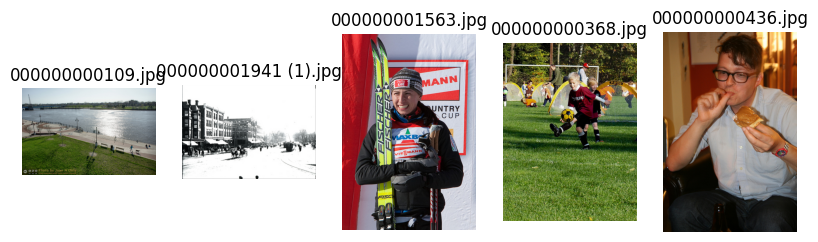

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Get list of image files
image_files = [f for f in os.listdir(output_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'))]

# Select a few random images
num_samples = min(5, len(image_files))  # Show up to 5 images
sample_files = random.sample(image_files, num_samples)

# Display images
plt.figure(figsize=(10, 5))
for i, filename in enumerate(sample_files):
    img_path = os.path.join(output_folder, filename)
    img = cv2.imread(img_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(filename)

plt.show()


# **Task-3 prepare your YOLO training dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/COCO/coco2017_subset/"
if not os.path.exists(path):
    print("Path does not exist. Please check the directory name and structure.")
else:
    print("Path exists. You can proceed.")


Path exists. You can proceed.


In [ ]:
#creating a yaml file
%cd /content/drive/MyDrive/coco2017_preprocessed_train

/content/drive/MyDrive/coco2017_preprocessed_train


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -lh "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/"


total 223M
-rw------- 1 root root  23M Feb 24 06:48 captions_train2017_subset.json
-rw------- 1 root root 974K Feb 24 06:48 captions_val2017_subset.json
-rw------- 1 root root 126M Feb 24 06:48 instances_train2017_subset.json
-rw------- 1 root root 5.4M Feb 24 06:48 instances_val2017_subset.json
-rw------- 1 root root  66M Feb 24 06:48 person_keypoints_train2017_subset.json
-rw------- 1 root root 2.7M Feb 24 06:48 person_keypoints_val2017_subset.json


In [ ]:
json_path = "/content/drive/MyDrive/coco2017_subset/annotation_subset/instances_train2017_subset.json"


In [ ]:
json_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"


In [ ]:
import json

json_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"

# Try to open and load the JSON file
try:
    with open(json_path, "r") as file:
        data = json.load(file)
        print("JSON file loaded successfully!")
        print("Number of annotations:", len(data.get("annotations", [])))
except Exception as e:
    print("Error reading JSON file:", e)


JSON file loaded successfully!
Number of annotations: 212806


In [ ]:
!ls -R /content/drive/MyDrive/COCO/


/content/drive/MyDrive/COCO/:
coco2017_subset

/content/drive/MyDrive/COCO/coco2017_subset:
annotation_subset  test2017  train2017	val2017

/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset:
captions_train2017_subset.json	 instances_val2017_subset.json
captions_val2017_subset.json	 person_keypoints_train2017_subset.json
instances_train2017_subset.json  person_keypoints_val2017_subset.json

/content/drive/MyDrive/COCO/coco2017_subset/test2017:
 000000000001.jpg	 000000036646.jpg	 000000073410.jpg   000000109581.jpg
 000000000016.jpg	 000000036647.jpg	 000000073428.jpg   000000109590.jpg
 000000000019.jpg	 000000036683.jpg	 000000073435.jpg   000000109618.jpg
 000000000057.jpg	 000000036695.jpg	 000000073441.jpg   000000109660.jpg
 000000000063.jpg	 000000036700.jpg	 000000073448.jpg   000000109668.jpg
 000000000069.jpg	 000000036706.jpg	 000000073457.jpg   000000109676.jpg
 000000000080.jpg	 000000036752.jpg	 000000073465.jpg   000000109684.jpg
 000000000090.jpg	 00000003676

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
json_path = "/content/drive/MyDrive/COCO/annotation_subset/instances_train2017_subset.json"


In [ ]:
import os

json_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"
print("File exists:", os.path.exists(json_path))


File exists: True


In [ ]:
!ls -R /content/drive/MyDrive/COCO/


/content/drive/MyDrive/COCO/:
coco2017_subset

/content/drive/MyDrive/COCO/coco2017_subset:
annotation_subset  test2017  train2017	val2017

/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset:
captions_train2017_subset.json	 instances_val2017_subset.json
captions_val2017_subset.json	 person_keypoints_train2017_subset.json
instances_train2017_subset.json  person_keypoints_val2017_subset.json

/content/drive/MyDrive/COCO/coco2017_subset/test2017:
 000000000001.jpg	 000000036646.jpg	 000000073410.jpg   000000109581.jpg
 000000000016.jpg	 000000036647.jpg	 000000073428.jpg   000000109590.jpg
 000000000019.jpg	 000000036683.jpg	 000000073435.jpg   000000109618.jpg
 000000000057.jpg	 000000036695.jpg	 000000073441.jpg   000000109660.jpg
 000000000063.jpg	 000000036700.jpg	 000000073448.jpg   000000109668.jpg
 000000000069.jpg	 000000036706.jpg	 000000073457.jpg   000000109676.jpg
 000000000080.jpg	 000000036752.jpg	 000000073465.jpg   000000109684.jpg
 000000000090.jpg	 00000003676

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls -R /content/drive/MyDrive/coco2017_subset/annotation_subset/


ls: cannot access '/content/drive/MyDrive/coco2017_subset/annotation_subset/': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls -R /content/drive/MyDrive/coco2017_subset/annotation_subset/


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
ls: cannot access '/content/drive/MyDrive/coco2017_subset/annotation_subset/': No such file or directory


In [ ]:
!ls -R /content/drive/MyDrive/


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/content/drive/MyDrive/:
 COCO
 coco2017_preprocessed_train
 coco2017_subset
 coco2017_subset....
 coco2017_subset_clean
 coco2017_subset.zip
'Colab Notebooks'
'Frootiiiii 14.pdf'
 IMG-20240821-WA0001.jpg
'Infosys survey (1).jpg'
'Infosys survey.jpg'
 internship
 kaggle.json
'Le 14.pdf'
'LE 19.pdf'
 MSANGEETHARESUME..df
'Ramya resume'
 Screenshot_2024-09-23-14-43-30-54_944a2809ea1b4cda6ef12d1db9048ed3.pdf
 Screenshot_2024-09-26-21-02-00-21_944a2809ea1b4cda6ef12d1db9048ed3.jpg
 Screenshot_2024-09-27-14-23-24-55_944a2809ea1b4cda6ef12d1db9048ed3.jpg
 Screenshot_2024-12-18-19-57-05-14_c37d74246d9c81aa0bb824b57eaf7062.jpg
'Shruthi resume '

/content/drive/MyDrive/COCO:
coco2017_subset

/content/drive/MyDrive/COCO/coco2017_subset:
annotation_subset  test2017  train2017	val2017

/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset:
captions_train2017_subset.js

In [ ]:
!ls -R "/content/drive/MyDrive/COCO/"


shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/content/drive/MyDrive/COCO/:
coco2017_subset

/content/drive/MyDrive/COCO/coco2017_subset:
annotation_subset  test2017  train2017	val2017

/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset:
captions_train2017_subset.json	 instances_val2017_subset.json
captions_val2017_subset.json	 person_keypoints_train2017_subset.json
instances_train2017_subset.json  person_keypoints_val2017_subset.json

/content/drive/MyDrive/COCO/coco2017_subset/test2017:
 000000000001.jpg	 000000036646.jpg	 000000073410.jpg   000000109581.jpg
 000000000016.jpg	 000000036647.jpg	 000000073428.jpg   000000109590.jpg
 000000000019.jpg	 000000036683.jpg	 000000073435.jpg   000000109618.jpg
 000000000057.jpg	 000000036695.jpg	 000000073441.jpg   000000109660.jpg
 000000000063.jpg	 000000036700.jpg	 000000073448.jpg   000000109668.jpg
 000000000069.jpg	 000000036706.jpg	 000000073457.

In [ ]:
import os
file_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"

print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/"


captions_train2017_subset.json	 instances_val2017_subset.json
captions_val2017_subset.json	 person_keypoints_train2017_subset.json
instances_train2017_subset.json  person_keypoints_val2017_subset.json


In [ ]:
import os

file_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"
print("File exists:", os.path.exists(file_path))


File exists: True


In [ ]:
import json

file_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"

with open(file_path, "r") as f:
    coco_data = json.load(f)

print("JSON loaded successfully!")


JSON loaded successfully!


In [ ]:
import os
file_path = "/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json"
print("File size:", os.path.getsize(file_path), "bytes")


File size: 131268236 bytes


In [ ]:
print(coco_data.keys())  # To see available keys


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [ ]:
class_names = [category["name"] for category in coco_data["categories"]]
print("Classes:", class_names)
print("Total Classes:", len(class_names))


Classes: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Total Classes: 80


In [ ]:
annotations = coco_data["annotations"]
print("Total Annotations:", len(annotations))


Total Annotations: 212806


In [ ]:
print(annotations[0])  # Print the first annotation


{'segmentation': [[321.02, 321.0, 314.25, 307.99, 307.49, 293.94, 300.2, 286.14, 290.84, 277.81, 285.11, 276.25, 267.94, 277.81, 256.49, 279.89, 244.52, 281.97, 227.35, 287.18, 192.49, 290.3, 168.55, 289.26, 142.53, 287.18, 121.72, 293.42, 105.07, 303.83, 94.14, 313.2, 86.33, 326.73, 84.25, 339.22, 76.97, 343.9, 67.6, 345.46, 61.87, 350.66, 69.16, 360.03, 77.49, 360.03, 93.62, 358.99, 105.07, 356.91, 110.27, 351.7, 117.55, 353.79, 121.2, 352.74, 132.64, 361.07, 139.41, 367.32, 145.89, 373.77, 156.05, 374.5, 160.41, 370.14, 167.67, 367.96, 168.39, 370.87, 169.84, 362.88, 166.94, 356.35, 177.83, 353.45, 190.89, 353.45, 209.54, 358.32, 224.96, 360.09, 240.82, 361.85, 258.45, 364.49, 267.43, 374.29, 275.14, 377.71, 293.14, 379.43, 300.86, 370.86, 303.43, 358.86, 312.0, 356.29, 326.57, 361.43, 341.14, 365.71, 344.57, 369.14, 358.29, 370.86, 358.29, 364.0, 355.71, 360.57, 342.86, 348.57, 334.29, 340.0, 320.57, 322.86]], 'area': 18234.62355, 'iscrowd': 0, 'image_id': 74, 'bbox': [61.87, 276.2

In [ ]:
images = coco_data["images"]
print("Total Images:", len(images))
print("First Image Info:", images[0])  # Print first image details


Total Images: 29571
First Image Info: {'license': 4, 'file_name': '000000522418.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-14 11:38:44', 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg', 'id': 522418}


In [ ]:
category_id_to_name = {category["id"]: category["name"] for category in coco_data["categories"]}
print(category_id_to_name)


{1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'micro

In [ ]:
import json

# Load COCO annotations
with open("/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json") as f:
    coco_data = json.load(f)  # Load JSON only once

# Extract class names
class_names = [category["name"] for category in coco_data["categories"]]
num_classes = len(class_names)

print("Classes:", class_names)
print("Total Classes:", num_classes)


Classes: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
Total Classes: 80


In [ ]:
try:
    with open("/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json") as f:
        coco_data = json.load(f)
    print("JSON loaded successfully!")
except json.JSONDecodeError as e:
    print("Error loading JSON:", e)


JSON loaded successfully!


In [ ]:
num_classes = 80  # Set your number of classes here
class_names = ["class1", "class2", "class3"]  # Replace with actual class names


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset_config.yaml/dataset.yaml"


# Check if the path is a directory
if os.path.isdir(yaml_path):
    print(f"❌ ERROR: {yaml_path} is a directory. Please check the path.")
else:
    print(f"✅ {yaml_path} is a valid file path.")


✅ /content/drive/MyDrive/COCO/coco2017_subset/dataset_config.yaml/dataset.yaml is a valid file path.


In [ ]:
# Mount Google Drive first (only needed in Colab)
from google.colab import drive
drive.mount('/content/drive')

# Define file path in Google Drive
yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset_config.yaml/dataset.yaml"


# Define YAML content
yaml_content = """train: /content/drive/MyDrive/COCO/coco2017_subset/train2017
val: /content/drive/MyDrive/COCO/coco2017_subset/val2017
test: /content/drive/MyDrive/COCO/coco2017_subset/test2017
nc: 80
names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']
"""

# Write the YAML file in Google Drive
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"dataset.yaml has been created successfully at: {yaml_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset.yaml has been created successfully at: /content/drive/MyDrive/COCO/coco2017_subset/dataset_config.yaml/dataset.yaml


In [ ]:
import os

yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset_config.yaml/dataset.yaml"


if os.path.exists(yaml_path):
    print("dataset.yaml exists!")
else:
    print("dataset.yaml was not created.")


dataset.yaml exists!


In [ ]:
import yaml

with open(yaml_path, "r") as file:
    data = yaml.safe_load(file)

print(data)


{'train': '/content/drive/MyDrive/COCO/coco2017_subset/train2017', 'val': '/content/drive/MyDrive/COCO/coco2017_subset/val2017', 'test': '/content/drive/MyDrive/COCO/coco2017_subset/test2017', 'nc': 80, 'names': ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light']}


In [ ]:
import yaml

# Define your variables properly
num_classes = 80
class_names = ["class1", "class2", "class3"]

# YAML configuration
data = {
    'path': '/content/drive/MyDrive/COCO/coco2017_subset/',
    'train': '/content/drive/MyDrive/COCO/coco2017_subset/train2017/',
    'val': '/content/drive/MyDrive/COCO/coco2017_subset/val2017/',
    'test': '/content/drive/MyDrive/COCO/coco2017_subset/test2017/',
    'nc': num_classes,
    'names': class_names
}

# Try writing again
yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"

try:
    with open(yaml_path, "w") as file:
        yaml.dump(data, file, default_flow_style=False)
    print("dataset.yaml created successfully!")
except Exception as e:
    print("Error creating YAML file:", e)


dataset.yaml created successfully!


In [ ]:
import yaml

# .yaml configuration
data = {
    'path': '/content/drive/MyDrive/COCO/coco2017_subset/',    # Root directory
    'train': '/content/drive/MyDrive/COCO/coco2017_subset/train2017/',            # Path to preprocessed train images relative to root
    'val': '/content/drive/MyDrive/COCO/coco2017_subset/val2017/',                # Path to val images relative to root
    'test': '/content/drive/MyDrive/COCO/coco2017_subset/test2017/',              # Path to test images relative to root
    'nc': num_classes,                         # Number of classes (update this later if needed)
    'names': class_names                      # To be filled with class names
}

# Save the .yaml file in cocodataset folder
with open('/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("dataset.yaml created successfully!")


dataset.yaml created successfully!


In [ ]:
!cat /content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml


names:
- class1
- class2
- class3
nc: 80
path: /content/drive/MyDrive/COCO/coco2017_subset/
test: /content/drive/MyDrive/COCO/coco2017_subset/test2017/
train: /content/drive/MyDrive/COCO/coco2017_subset/train2017/
val: /content/drive/MyDrive/COCO/coco2017_subset/val2017/


In [ ]:
#creating .txt files for validation
import json
import os

In [ ]:
# defining paths
coco_ann_file = '/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_val2017_subset.json'
output_dir = '/content/drive/MyDrive/COCO/coco2017_subset/val2017'

In [ ]:
# Load COCO annotations
with open(coco_ann_file, 'r') as f:
    coco_data = json.load(f)

In [ ]:
# Creating a mapping: COCO category id -> new id (0-based contiguous indices)
#the category ids may not be in a sequence
coco_categories = sorted([cat['id'] for cat in coco_data['categories']]) #sorted list of category ids
id_mapping = {orig_id: new_id for new_id, orig_id in enumerate(coco_categories)}##(0, 1), (1, 3), (2, 5), (3, 7)

In [ ]:
# Build a mapping from image_id to image info
img_info = {img['id']: img for img in coco_data['images']}

In [ ]:
# Process annotations per image
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    img = img_info[img_id]
    img_width, img_height = img['width'], img['height']

    x, y, w, h = ann['bbox']
    # Convert COCO bbox [x, y, w, h] to YOLO format [x_center, y_center, width, height] normalized
    #x,y at top left -> 0,0
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    norm_w = w / img_width
    norm_h = h / img_height

    # Remap the category id
    orig_cat = ann['category_id']
    if orig_cat not in id_mapping:
        continue  # skip if the category is not in the mapping
    new_cat = id_mapping[orig_cat] #number for category

    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(f"{new_cat} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

In [ ]:
# Write YOLO label files for each image in a .txt file
for img_id, ann_list in annotations_by_image.items():
    file_name = img_info[img_id]['file_name']
    base_name = os.path.splitext(file_name)[0]
    # Save the label file in the same directory as images
    out_file = os.path.join(output_dir, base_name + '.txt')
    with open(out_file, 'w') as f:
        for line in ann_list:
            f.write(line + '\n')

In [ ]:
#Similarly for the train images
# defining paths
coco_ann_file = '/content/drive/MyDrive/COCO/coco2017_subset/annotation_subset/instances_train2017_subset.json'
output_dir = '/content/drive/MyDrive/COCO/coco2017_subset/train2017'

In [ ]:
# Load COCO annotations
with open(coco_ann_file, 'r') as f:
    coco_data = json.load(f)

In [ ]:
# Creating a mapping: COCO category id -> new id (0-based contiguous indices)
#the category ids may not be in a sequence
coco_categories = sorted([cat['id'] for cat in coco_data['categories']]) #sorted list of category ids
id_mapping = {orig_id: new_id for new_id, orig_id in enumerate(coco_categories)}##(0, 1), (1, 3), (2, 5), (3, 7)

In [ ]:
# Build a mapping from image_id to image info
img_info = {img['id']: img for img in coco_data['images']}

In [ ]:
# Process annotations per image
annotations_by_image = {}
for ann in coco_data['annotations']:
    img_id = ann['image_id']
    img = img_info[img_id]
    img_width, img_height = img['width'], img['height']

    x, y, w, h = ann['bbox']
    # Convert COCO bbox [x, y, w, h] to YOLO format [x_center, y_center, width, height] normalized
    #x,y at top left -> 0,0
    x_center = (x + w / 2) / img_width
    y_center = (y + h / 2) / img_height
    norm_w = w / img_width
    norm_h = h / img_height

    # Remap the category id
    orig_cat = ann['category_id']
    if orig_cat not in id_mapping:
        continue  # skip if the category is not in the mapping
    new_cat = id_mapping[orig_cat] #number for category

    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(f"{new_cat} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

In [ ]:
# Write YOLO label files for each image in a .txt file
for img_id, ann_list in annotations_by_image.items():
    file_name = img_info[img_id]['file_name']
    base_name = os.path.splitext(file_name)[0]
    # Save the label file in the same directory as images
    out_file = os.path.join(output_dir, base_name + '.txt')
    with open(out_file, 'w') as f:
        for line in ann_list:
            f.write(line + '\n')

# **Task-4 Training the model**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 834.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")


CUDA Available: False
GPU Name: No GPU found


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 63.9MB/s]


In [ ]:
data_yaml="/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"
#specify the dataset yaml file

In [ ]:
#set training parameters
epochs=2
img_size=640 #training image size (yolo resizes the images internally )
batch_size=8 #four images at a time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.path.exists('/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml'))


True


In [ ]:
!ls /content/drive/MyDrive/COCO/coco2017_subset/


annotation_subset  dataset_config.yaml	dataset.yaml  test2017	train2017  val2017


In [ ]:
import yaml

yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)


{'names': ['class1', 'class2', 'class3'], 'nc': 80, 'path': '/content/drive/MyDrive/COCO/coco2017_subset/', 'test': '/content/drive/MyDrive/COCO/coco2017_subset/test2017/', 'train': '/content/drive/MyDrive/COCO/coco2017_subset/train2017/', 'val': '/content/drive/MyDrive/COCO/coco2017_subset/val2017/'}


In [ ]:
import yaml

yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"

with open(yaml_path, 'r') as f:
    data_yaml = yaml.safe_load(f)

print(data_yaml)


{'names': ['class1', 'class2', 'class3'], 'nc': 80, 'path': '/content/drive/MyDrive/COCO/coco2017_subset/', 'test': '/content/drive/MyDrive/COCO/coco2017_subset/test2017/', 'train': '/content/drive/MyDrive/COCO/coco2017_subset/train2017/', 'val': '/content/drive/MyDrive/COCO/coco2017_subset/val2017/'}


In [ ]:
import os

yaml_path = "/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"  # Update path

if os.path.exists(yaml_path):
    print("✅ dataset.yaml file found!")
else:
    print("❌ dataset.yaml file NOT found! Check the path.")


✅ dataset.yaml file found!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import os
print(os.path.exists("/content/drive/MyDrive/COCO/coco2017_subset/dataset.yaml"))


True


In [ ]:
!ls /content/drive/MyDrive/COCO/coco2017_subset/


annotation_subset  dataset.yaml  test2017  train2017  val2017


In [ ]:
import os

path = "/content/drive/MyDrive/COCO/coco2017_subset"
print(os.listdir(path))


['train2017', 'val2017', 'test2017', 'annotation_subset', 'dataset.yaml']


In [ ]:
for file in os.listdir(path):
    if "dataset" in file:  # Find files with 'dataset' in the name
        print(file)


dataset.yaml


In [ ]:
['dataset.yaml1']


['dataset.yaml1']

In [ ]:
# Create the dataset.yaml file in the /content directory
with open('/content/dataset.yaml', 'w') as f:
    f.write("""
train: /content/drive/MyDrive/COCO/coco2017_subset/train2017
val: /content/drive/MyDrive/COCO/coco2017_subset/val2017
test: /content/drive/MyDrive/COCO/coco2017_subset/test2017

nc: 80
names: ["person", "bicycle", "car", "motorcycle", ...]  # List of class names
""")

In [ ]:
!ls /content  # This should list the files in the /content directory

dataset.yaml  data.yaml  drive	runs  sample_data  yolo11n.pt  yolov8n.pt


In [ ]:
!ls -la /content/dataset.yaml
!cat /content/dataset.yaml

-rw-r--r-- 1 root root 264 Mar  8 09:09 /content/dataset.yaml

train: /content/drive/MyDrive/COCO/coco2017_subset/train2017
val: /content/drive/MyDrive/COCO/coco2017_subset/val2017
test: /content/drive/MyDrive/COCO/coco2017_subset/test2017

nc: 80
names: ["person", "bicycle", "car", "motorcycle", ...]  # List of class names


In [ ]:
# First, create a clean, new YAML file with appropriate content
with open('/content/coco_dataset.yaml', 'w') as f:
    f.write("""
train: /content/drive/MyDrive/COCO/coco2017_subset/train2017
val: /content/drive/MyDrive/COCO/coco2017_subset/val2017
test: /content/drive/MyDrive/COCO/coco2017_subset/test2017

nc: 3
names: ['class1', 'class2', 'class3']
""")

# Now start fresh with a new model initialization and training
from ultralytics import YOLO

# Initialize a new model
model = YOLO('yolov8n.pt')

# Train with just the path string - no dictionaries or variables for the data parameter
print("Starting YOLO training...")
results = model.train(
    data='/content/coco_dataset.yaml',  # Just a simple string path
    epochs=2,
    imgsz=640,
    batch=8,
    device='cpu'
)
print("Training completed.")

Starting YOLO training...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/coco_dataset.yaml, epochs=2, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/COCO/coco2017_subset/train2017... 1967 images, 13 backgrounds, 1955 corrupt: 100%|██████████| 1980/1980 [14:43<00:00,  2.24it/s] 

train: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/train2017/000000000034.jpg: ignoring corrupt image/label: Label class 22 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/train2017/000000000036.jpg: ignoring corrupt image/label: Label class 25 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/train2017/000000000073.jpg: ignoring corrupt image/label: Label class 3 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/train2017/000000000074.jpg: ignoring corrupt image/label: Label class 16 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/train2017/000000000089.jpg: ignoring corrupt image/label: Label class 73 exceeds dataset class count 3. Possible class labels are 0-2
train: WARNING ⚠️ /co

train: New cache created: /content/drive/MyDrive/COCO/coco2017_subset/train2017.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/COCO/coco2017_subset/val2017... 1237 images, 13 backgrounds, 1228 corrupt: 100%|██████████| 1250/1250 [01:12<00:00, 17.30it/s]


val: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/val2017/000000001353.jpg: ignoring corrupt image/label: Label class 6 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/val2017/000000001425.jpg: ignoring corrupt image/label: Label class 48 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/val2017/000000001490.jpg: ignoring corrupt image/label: Label class 37 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/val2017/000000001761.jpg: ignoring corrupt image/label: Label class 4 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/COCO/coco2017_subset/val2017/000000001818.jpg: ignoring corrupt image/label: Label class 22 exceeds dataset class count 3. Possible class labels are 0-2
val: WARNING ⚠️ /content/drive/MyDrive/COC

        1/2         0G      1.076      4.035      1.113          1        640: 100%|██████████| 4/4 [00:26<00:00,  6.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.15s/it]

                   all         22         21    0.00232      0.502     0.0396     0.0295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.165       4.01      1.241          1        640: 100%|██████████| 4/4 [00:21<00:00,  5.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.93s/it]

                   all         22         21     0.0025      0.502      0.079     0.0538



2 epochs completed in 0.021 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 6.2MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


                   all         22         21     0.0025      0.502     0.0787     0.0533
                class1          7         11    0.00497      0.727      0.149      0.115
                class2          3          9    0.00254      0.778     0.0866     0.0452
                class3          1          1          0          0          0          0
Speed: 2.6ms preprocess, 220.8ms inference, 0.0ms loss, 32.1ms postprocess per image
Results saved to runs/detect/train21
Training completed.


In [ ]:
!ls runs/detect/train2/weights/

In [ ]:
!cp runs/detect/train2/weights/best.pt /content/drive/MyDrive/Yolo_Models/
!cp runs/detect/train2/weights/last.pt /content/drive/MyDrive/Yolo_Models/

cp: cannot stat 'runs/detect/train2/weights/best.pt': No such file or directory
cp: cannot stat 'runs/detect/train2/weights/last.pt': No such file or directory


In [ ]:
import os

drive_folder = "/content/drive/MyDrive/Yolo_Models"
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)  # Create folder if it doesn't exist

In [ ]:

import os

drive_folder = "/content/drive/MyDrive/Yolo_Training"
if not os.path.exists(drive_folder):
    os.makedirs(drive_folder)  # Create folder if it doesn't exist

In [ ]:
!cp -r runs/ /content/drive/MyDrive/Yolo_Training/

In [ ]:
pip install ultralytics torch torchvision opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch

print(torch.cuda.is_available())

print(torch.version.cuda)

True
12.4


In [ ]:
# 1.Model Initialization

model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 190MB/s]


In [ ]:
# 2.Training Configuration

data_yaml = 'coco.yaml'

epochs = 5

img_size =640

batch_size = 1